In [66]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def loaddata(filename):
    data = []
    with open(filename) as fr:
        for line in fr.readlines():
            cur = line.strip().split()
            fltline = list(map(float,cur))
            data.append(fltline)
        return np.array(data)

In [150]:
filename1 = '/Users/enjlife/machine-learning/machinelearninginaction/ch10/testSet.txt'
filename2 = '/Users/enjlife/machine-learning/machinelearninginaction/ch10/testSet2.txt'
filename3 = '/Users/enjlife/machine-learning/machinelearninginaction/ch10/portlandClubs.txt'
filename4 = '/Users/enjlife/machine-learning/machinelearninginaction/ch10/places.txt'

In [34]:
data = loaddata(filename1)
data1 = loaddata(filename2)

In [13]:
def dist(veca,vecb):
    return np.sqrt(np.sum(np.square(veca-vecb)))
def randcent(data,k):
    n = data.shape[1]
    cent = np.zeros((k,n))
    for j in range(n):
        minj = np.min(data[:,j])
        rangj = float(np.max(data[:,j]-minj))
        cent[:,j] = np.squeeze(minj + rangj*np.random.rand(k,1))
    return cent

In [22]:
dist(data[0],data[1])

5.184632816681332

In [187]:
def kmeans(data,k,distmeas=dist,crcent=randcent):
    m = data.shape[0]
    cluster = np.zeros((m,2))
    #print(data.shape)
    cent = crcent(data,k)
    changed = True
    while changed:
        changed = False
        for i in range(m):
            mindis = float('inf')
            minidx = -1
            for j in range(k):
                distji = distmeas(cent[j,:],data[i,:])
                if distji<mindis:
                    mindis = distji
                    minidx = j
            if cluster[i,0] != minidx: changed=True#所有样本不再改变，退出循环
            cluster[i,:] = minidx,mindis**2
        #print(cent)
        for cen in range(k):
            pts = data[np.nonzero(cluster[:,0]==cen)[0]]
            cent[cen,:] = np.mean(pts,0)
    return cent,cluster

[[ 4.0874063   2.72558262]
 [ 3.14432645 -1.73301379]]
[[ 0.12097373  3.39830046]
 [-0.60606057 -2.27031783]]
[[-0.00675605  3.22710297]
 [-0.45965615 -2.7782156 ]]


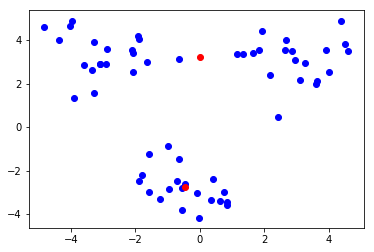

In [102]:
mycent,mycluster = kmeans(data1,2)#结果相同但顺序不同
np.sum(mycluster[:,1])
plt.figure()
plt.scatter(data1[:,0],data1[:,1],c='blue')
plt.scatter(mycent[:,0],mycent[:,1],c='red')

In [94]:
np.sum(mycluster[:,1])

453.0334895807502

In [205]:
#二分 K-均值算法
def bikmeans(data,k,distmeas=dist):
    m = data.shape[0]
    cluster = np.zeros((m,2))
    cent = np.mean(data,0).tolist()#初始化一个簇
    centlist = [cent]
    for i in range(m):
        cluster[i,1] = distmeas(np.array(cent),data[i,:])**2
    while (len(centlist)<k):
        lowsse = float('inf')
        for i in range(len(centlist)):
            ptscluster = data[np.nonzero(cluster[:,0]==i)[0],:]#获取一个分类的数据
            centtoid,splitclus = kmeans(ptscluster,2,distmeas)#执行分类获取质心和聚类结果（包含方差）
            ssesplit = np.sum(splitclus[:,1])
            ssenotsplit = np.sum(cluster[np.nonzero(cluster[:,0]!=i)[0],1])
            #if ssenotsplit<0: print(data[np.nonzero(cluster[:,0]!=i)[0],1])这里把cluster输成data导致ssenotsplit一直有负的...
            print('ssesplit,ssenotsplit',ssesplit,ssenotsplit)
            if (ssesplit+ssenotsplit)< lowsse:#比较方差和
                bestcent=i
                bestnewcents=centtoid
                bestclu=splitclus.copy()
                lowsse = ssesplit+ssenotsplit
        bestclu[np.nonzero(bestclu[:,0]==1)[0],0] = len(centlist)#若原来cnetlist有两个质心（0 1），则这个簇序列号为2
        bestclu[np.nonzero(bestclu[:,0]==0)[0],0] = bestcent#继承原来的簇序列号
        #print('the best cent to split is ',bestcent)
        #print('the len of bestclu is ',len(bestclu))
        print('the split result',len(bestclu[np.nonzero(bestclu[:,0]==bestcent)[0],0]))
        centlist[bestcent]=bestnewcents[0,:]
        centlist.append(bestnewcents[1,:])
        cluster[np.nonzero(cluster[:,0]==bestcent)[0],:] = bestclu#cluster[cluster[:,0]==bestcent,:] = bestclu
    return np.array(centlist),cluster    

In [114]:
bicent,bicluster = bikmeans(data1,3)

[[ 3.1756234   3.54851322]
 [-0.15388804 -2.60216989]]
[[ 0.58903841  3.38112482]
 [-1.13425658 -1.59378604]]
[[ 0.18204313  3.32057745]
 [-0.74459109 -2.39373345]]
[[-0.00675605  3.22710297]
 [-0.45965615 -2.7782156 ]]
ssesplit,ssenotsplit 453.0334895807502 0.0
the best cent to split is  0
the len of bestclu is  60
[[-2.06549483  3.57306538]
 [ 2.67016146  1.74429952]]
[[-2.94737575  3.3263781 ]
 [ 2.93386365  3.12782785]]
ssesplit,ssenotsplit 77.59224931775066 29.15724944412535
[[-0.02853303 -4.01948254]
 [-0.74259331 -2.11839241]]
[[ 0.34658275 -3.48379675]
 [-0.99714875 -2.30782817]]
[[ 0.35496167 -3.36033556]
 [-1.12616164 -2.30193564]]
ssesplit,ssenotsplit 12.753263136887313 423.8762401366249
the best cent to split is  0
the len of bestclu is  40


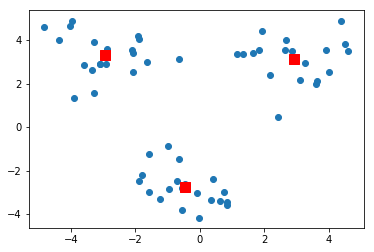

In [193]:
plt.figure()
plt.scatter(data1[:,0],data1[:,1])
plt.scatter(bicent[:,0],bicent[:,1],c='red',s=90,marker='s')

In [116]:
import urllib
import json
from time import sleep

In [138]:
# 这里的api已经失效了可能，直接采用的作者的数据
def geograb(address,city):
    apistem = 'http://where.yahooapis.com/geocode?'
    params = {}
    params['flags'] = 'J'
    params['appid'] = 'ppp68N8t'
    params['location'] = '%s %s' %(address,city)
    url_params = urllib.parse.urlencode(params)
    yahooapi = apistem + url_params
    print(yahooapi)
    c = urllib.request.urlopen(yahooapi)
    return json.loads(c.read())
def placefind(filename):
    with open(filename4,'w') as fw:
        for line in open(filename).readlines():
            line = line.strip()
            arr = line.split('\t')
            retdict = geograb(arr[1],arr[2])
            if redict['ResultSet']['Error'] ==0:
                lat = float(redict['ResultSet']['Result'][0]['latitude'])
                lng = float(redict['ResultSet']['Result'][0]['longitude'])
                print('%s\t%f\t%f' %(arr[0],lat,lng))
                fw.write('%s\t%f\t%f\n' %(line,lat,lng))
            else:
                print('error fetching')
            sleep(1)

In [130]:
placefind(filename3)

In [139]:
georesult = geograb('1 VA Center','Augusta,ME')

http://where.yahooapis.com/geocode?flags=J&appid=ppp68N8t&location=1+VA+Center+Augusta%2CME


URLError: <urlopen error [Errno 60] Operation timed out>

In [168]:
def distslc(veca,vecb): 
    a = np.sin(veca[1]*np.pi/180)*np.sin(vecb[1]*np.pi/180)
    b = np.cos(veca[1]*np.pi/180)*np.cos(vecb[1]*np.pi/180)*np.cos(np.pi*(vecb[0]-veca[0])/180)
    return np.arccos(a+b)*6371.0#向量外积

In [147]:
help(np.cross)

Help on function cross in module numpy.core.numeric:

cross(a, b, axisa=-1, axisb=-1, axisc=-1, axis=None)
    Return the cross product of two (arrays of) vectors.
    
    The cross product of `a` and `b` in :math:`R^3` is a vector perpendicular
    to both `a` and `b`.  If `a` and `b` are arrays of vectors, the vectors
    are defined by the last axis of `a` and `b` by default, and these axes
    can have dimensions 2 or 3.  Where the dimension of either `a` or `b` is
    2, the third component of the input vector is assumed to be zero and the
    cross product calculated accordingly.  In cases where both input vectors
    have dimension 2, the z-component of the cross product is returned.
    
    Parameters
    ----------
    a : array_like
        Components of the first vector(s).
    b : array_like
        Components of the second vector(s).
    axisa : int, optional
        Axis of `a` that defines the vector(s).  By default, the last axis.
    axisb : int, optional
        Axi

In [200]:
def cluclub(filename,num=5):
    datlist = []
    with open(filename) as fr:
        for line in fr.readlines():
            linearr = line.split('\t')
            datlist.append([float(linearr[4]),float(linearr[3])])
    data = np.array(datlist)
    mycent,cluster = bikmeans(data,num,distmeas=distslc)
    fig=plt.figure()
    rect = [0.1,0.1,0.8,0.8]#l,b,w,h
    scmaker = ['s','o','^','8','p','d','v','h','>','<']
    axprops = dict(xticks=[],yticks=[])
    ax0=fig.add_axes(rect,label='ax0',**axprops)#在位置rect增加一个坐标轴
    imgp = plt.imread('/Users/enjlife/machine-learning/machinelearninginaction/ch10/Portland.png')
    ax0.imshow(imgp)#显示图片
    ax1=fig.add_axes(rect,label='ax1',frameon=False)
    for i in range(num):
        ptsclu = data[np.nonzero(cluster[:,0]==i)[0],:]#获取每一个簇，对于每一个簇画一个style
        mastyle = scmaker[i%len(scmaker)]
        ax1.scatter(ptsclu[:,0],ptsclu[:,1],marker=mastyle,s=90)
    ax1.scatter(mycent[:,0],mycent[:,1],marker='+',s=300)#画出质心
    plt.show()

ssesplit,ssenotsplit 3043.263315808114 0.0
the split result 0.0
ssesplit,ssenotsplit 1321.0446322860967 851.4388885636852
ssesplit,ssenotsplit 501.3287881573154 2191.824427244429
the split result 0.0
ssesplit,ssenotsplit 245.684452017245 1594.360070185498
ssesplit,ssenotsplit 494.98425059436954 1321.0446322860967
ssesplit,ssenotsplit 410.1002223672573 1429.5623392279695
the split result 10.0
ssesplit,ssenotsplit 275.855667749565 1237.9054322161824
ssesplit,ssenotsplit 2.2994326371319347 1806.193631225216
ssesplit,ssenotsplit 279.34928298338923 1073.1077012586538
ssesplit,ssenotsplit 313.49641740579887 1330.879883941347
the split result 36.0


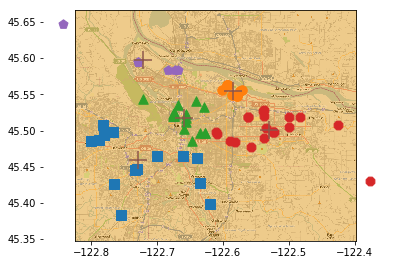

In [204]:
cluclub(filename4,num=5)

In [163]:
g[0]

1